<a href="https://colab.research.google.com/github/juliobracamonte-col/Project_1/blob/main/Estimaci%C3%B3n_Irradiaci%C3%B3n_Solar_y_potencia_el%C3%A9ctrica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estimación de la Irradiancia Solar y la Energía Generada en una Planta Solar Fotovoltaica**
Julio César Bracamonte Ahumada

Este código está hecho con el fin de representar gráficamente la irradiancia solar estimada en un punto fijo y la energía eléctrica que se podría obtener en dicho punto. Todo esto mediante modelos matemáticos descritos en el informe.

Para una mejor comprensión del código, se dividirá en múltiples secciones, cada una de ellas orientadas a explicar brevemente el funcionamiento y el uso del programa.

# **Entradas**

A continuación se describirán los datos que se solicitarán al usuario. Estos datos son esenciales para hacer las estimaciones.

In [ ]:
#Ubicación a evaluar
lat = float(input('Ingrese la latitud del lugar en un formato grado decimal. EJ.: 43.5\n(Los valores deben estar entre -90 y 90):\n'))
lon = float(input('Ingrese la longitud del lugar en un formato grado decimal. EJ.: -4.5\n(Los valores deben estar entre -180 y 180):\n'))
#Fecha
year = int(input('Ingrese el año que desea evaluar en un formato numérico. EJ.: 2022\nEscriba aquí: '))
mes = int(input('Ingrese el mes que desea evaluar en un formato numérico. EJ.: 1\n(Los valores deben estar entre 1 y 12):\n'))
dia = int(input('Ingrese el día que desea evaluar en un formato numérico. EJ.: 1\n(Los valores deben estar entre 1 y 31):\n'))
#Potencia en vatios
potencia = float(input('Ingrese la potencia en vatios que posee la planta o el panel solar (Sólo ingrese el número):\n'))

Ingrese la latitud del lugar en un formato grado decimal. EJ.: 43.5
(Los valores deben estar entre -90 y 90):
42.283
Ingrese la longitud del lugar en un formato grado decimal. EJ.: -4.5
(Los valores deben estar entre -180 y 180):
-71.35
Ingrese el año que desea evaluar en un formato numérico. EJ.: 2022
Escriba aquí: 2018
Ingrese el mes que desea evaluar en un formato numérico. EJ.: 1
(Los valores deben estar entre 1 y 12):
6
Ingrese el día que desea evaluar en un formato numérico. EJ.: 1
(Los valores deben estar entre 1 y 31):
26
Ingrese la potencia en vatios que posee la planta o el panel solar (Sólo ingrese el número):
270


Como se puede observar, el usuario debe ingresar los de datos de su ubicación en términos de latitud y longitud; esto en un formato de grados decimales puesto que facilita las operaciones. Además, se pide al usuario ingresar númericamente el año, el mes y el día específico que desea evaluar; esto es así porque optimiza el cálculo del día juliano del año. Finalmente, se solicita al usuario el dato de la potencia de su planta o panel solar.

# **Aplicación de modelos matemáticos**

En esta sección se hará uso de modelos matemáticos para la estimación tanto de la irradiación solar como la energía teórica que tendrá el sistema. Esta sección además, estará distribuida con el fin de que el proceso sea entendible en su totalidad.


## * **Estimación de la irradiancia solar**


### **Dia juliano del año**

Primero, se calculará el día juliano equivalente a la fecha ingresada por el usuario.

In [ ]:
#Cálculo del día juliano a evaluar
dia_mes = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]  #Una lista con el No. de días de cada mes
if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):  #Se verifica si el año es bisiesto
    dia_mes[1] = 29 #Si el año es bisiesto el mes de febrero contiene 29 días
dia_juliano = (sum(dia_mes[:mes-1])) + dia  #Se suma la totalidad de días de cada mes hasta llegar al número ingresado. Luego se suma el día

Así, se establece la cantidad de días que han pasado desde el inicio del año (día juliano del año). Con esto, se puede avanzar al siguiente paso.

### **Hora solar local**

Para ello, se debe enlistar cada hora local solar *'LST'* en intervalos de 15 minutos. De esta manera, la curva al momento de representar gráficamente será más precisa. La ecuación modelo para este paso es:
*LST = LT + (TC/60)*

Donde 'LT' es la hora local y TC es el factor de conversión del tiempo.

In [ ]:
from numpy import sin, cos, pi, arange
LT = arange(0, 24, 0.25, dtype=float) #Se crea una lista con las horas del día en intervalos de 15 minutos
f = (pi/180)*((360/365)*(dia_juliano-81))  #Se calcula el párametro para la Ecuación del Tiempo en radianes
EoT = 9.87*sin(2*f)-7.53*cos(f)-1.5*sin(f) #Se determina la Ecuación del Tiempo
LSTM = (pi/180)*15*(lon//15) #Se halla la hora solar local meridiana en términos de la longitud
TC = (pi/180)*4*(((pi/180)*lon)-LSTM)+EoT  #Se halla el Factor de correción del tiempo
LST =  [float(round((TC/60)+LT[i], 4)) for i in range(len(LT))] #Se crea la lista con las horas solores locales

Note que el factor de conversión del tiempo incluye variables como la hora solar local meridiana y la ecuación del tiempo, esto permite ajustar la hora local al movimiento que sigue el sol durante el día.

Con la lista de las horas solares locales se puede hacer uso de las fórmulas que describen el ángulo de declinación solar y el ángulo horario del sol. Ambos elementos son fundamentales para calcular el ángulo de la altura que alcanza el sol durante el día.

### **Declinación solar y ángulo horario**

La declinación solar será un valor fijo durante el día, mientras que el ángulo horario irá cambiando conforme el sol se vaya desplazando en el cielo.

In [ ]:
dec_solar = ((pi/180)*23.45)*(sin(2*pi*(284+dia_juliano)/365)) #Se calcula la Declinación Solar
ang_hor = [((pi/180)*15)*(LST[i]-12) for i in range(len(LST))] #Se calcula el Angulo

Con todo esto se podrá dar paso a la representación gráfica del movimiento del sol a lo largo del día evaluado.

### **Ángulo del sol durante el día**

A continuación, se implementará la siguiente ecuación para determinar el ángulo del sol a lo largo del día:

sin(h) = sin(dec_solar)*sin(latitud) + cos(dec_solar)*cos(latitud)*cos(ang_hor)

Donde 'sin(h)' es valor que se usará para crear la gráfica.

In [ ]:
#Se aplica la ecuación para cada valor de la lista 'ang_hor'
angulosolar = [round(float(sin(dec_solar)*sin(pi/180*lat) + cos(dec_solar)*cos(pi/180*lat)*cos(i)), 5) for i in ang_hor]

96

## **Representación gráfica de la altura del sol.**

Con las expresiones matemáticas anteriores se vuelve posible visualizar la altura del sol con respecto a la hora del día. Esto es, una gráfica donde el eje 'y' represente el seno del ángulo de la altura del sol (con 1 como valor máximo), y donde el eje de las abcisas muestre las horas del día.

In [ ]:
#Guardar como imagen la gráfica
preg = input('¿Desea guardar como imagen la gráfica que saldrá? Indique 1 para sí o 0 para no:\n')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

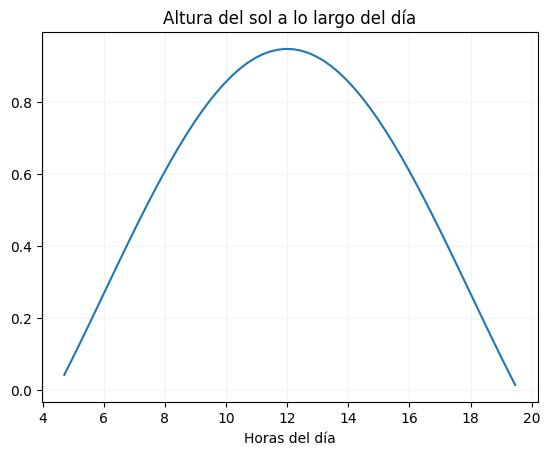

In [ ]:
import matplotlib.pyplot as plt  #Se importa la librería para graficar
from numpy import nan  # Se importa la función que filtrará los valores negativos

# Se descartan los valores cuando el sol esté debajo del horizonte
angulosolar_pos = [angulosolar[i] if angulosolar[i] >= 0 else nan for i in range(len(angulosolar))]
LST_angpos = [LST[i] if angulosolar[i] >= 0 else nan for i in range(len(angulosolar))]

#Se crea la gráfica
plt.plot(LST_angpos, angulosolar_pos) #Se define la curva
plt.title('Altura del sol a lo largo del día')  #Se coloca el título a la gráfica
plt.xlabel('Horas del día') #Se nombra al eje de las x
plt.grid(True, alpha=0.15) #Se colocan cuadrículas semi-transparentes
if preg == '1':
  # Se guarda la gráfica como imagen png
  from google.colab import files
  plt.savefig('altura_del_sol_.png')
  files.download('altura_del_sol_.png')
plt.show()  #Finalmente, se ordena mostrar la gráfica
plt.close() #Se cierra la gráfica para evitar consumir más memoria

Esta es la estimación para la altura del sol durante el día, donde el 1 en el eje y indica el 100% de altura alcanzada por el sol.

### **Irradiancia solar durante el día**

Ya se estableció la gráfica que describe la variación de la altura del sol con respecto a la hora del día. Sin embargo, se debe tomar en cuenta el efecto de la atmósfera sobre los rayos solares si se desea saber con precisión, cuánta energía produce el panel solar teóricamente.

In [ ]:
 #Se calcula la irradiancia solar
inci_solar = [1.4883*(0.7**(angulosolar_pos[i]**-0.678)) for i in range(len(angulosolar_pos))]

### **Potencia teórica de los paneles solares**

Una vez se obtengan los datos de irradiancia solar en las coordenadas ingresadas por el usuario, en la fecha establecida por el usuario, se aplica ecuación:

pot_teo = potencia * inci_solar[i] * angulosolar_pos[j]

Donde la potencia teórica está dada en términos de la potencia dada por el usuario. Asimismo, inci_solar[i] hace referencia a cada valor de la irradiancia solar durante el día. Y donde angulosolar_pos[j] es cada valor positivo del ángulo de la altura del sol durante el día.

El resultado es una lista que facilitará la representación gráfica.

In [ ]:
#Potencia Estimada
pot_teo = [round(float(min(potencia * i * j, 207)), 4) for i, j in zip(inci_solar, angulosolar_pos)]

## **Representación gráfica de la potencia teórica**

Con los datos anteriores, se hace la estimación de la potencia a lo largo del día.

In [ ]:
#Guardar como imagen la gráfica
preg2 = input('¿Desea guardar como imagen la gráfica que saldrá? Indique 1 para sí o 0 para no:\n')

¿Desea guardar como imagen la gráfica que saldrá? Indique 1 para sí o 0 para no:
1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

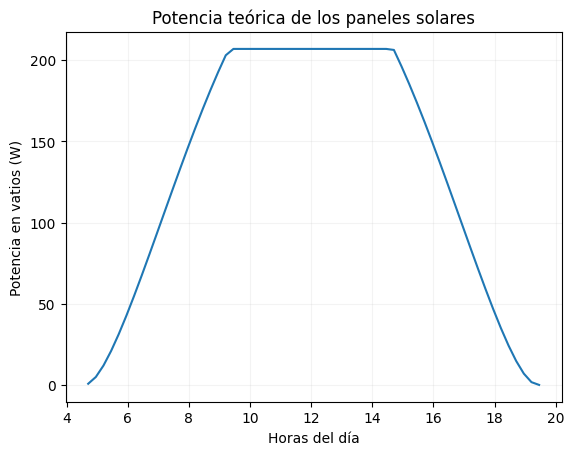

In [ ]:
plt.plot(LST_angpos, pot_teo) #Se define la curva
plt.title('Potencia teórica de los paneles solares')  #Se coloca el título a la gráfica
plt.xlabel('Horas del día') #Se nombra al eje de las x
plt.ylabel('Potencia en vatios (W)') #Se nombra al eje y
plt.grid(True, alpha=0.15) #Se colocan cuadrículas semi-transparentes
if preg2 == '1':
  #Guardar la figura como png
  plt.savefig('potencia_teorica.png')
  files.download('potencia_teorica.png')
plt.show()  #Finalmente, se ordena mostrar la gráfica
plt.close() #Se cierra la gráfica para ahorrar memoria

# **Comparación con datos reales**

  Es necesario visualizar las estimaciones realizadas con datos obtenidos a través de mediciones en la realidad para determinar conclusiones finales. Por este motivo, se implementará una porción de código para leer un archivo .xls con información obtenida durante el mes de junio del año 2022 por el equipo de *Mathwork*.

  Esto se hará mediante la librería de Pandas, la cual facilita la manipulación de datos para su posterior visualización gráfica, que es el objetivo de este código.

## **Lectura del archivo**

A continuación, se hará redacción de las lineas de código necesarias para la correcta lectura del archivo en excel.

**Importante**: Para esta sección es necesario tener descargado el arhivo de excel originario de: https://www.mathworks.com/matlabcentral/fileexchange/71156-getting-started-with-matlab-video-example-files

El archivo mencionado se debe encontrar en la misma carpeta comprimida que contiene el enlace a este código.

En caso de no encontrarlo, por favor: ingrese al link de Mathwork, inicie sesión (es gratis para 'entusiastas') y descargue el documento. En la carpeta comprimida encontrará una hoja de Excel de nombre 'SolarArrayProduction', extraiga dicha hoja cálculo sin modificar nada de ella.

Al momento de correr la primera parte del siguiente código,saltará un ventana emergente donde el usuario deberá seleccionar el correspondiente archivo llamado 'SolarArrayProduction.xlsx'. Una vez hecho esto, el código deberá correr con normalidad.



In [ ]:
#Parte 1: Subiendo el archivo a Colab
import xlrd
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  print('Archivo subido por el usuario: "{nombre}" con un tamaño de {length} bytes'.format(
      nombre=fn, length=len(uploaded[fn])))

#Parte 2: Leyendo el archivo con Pandas
try:
  df = pd.read_excel(list(uploaded.keys())[0])
except Exception as e:
  print(f"Ups, hubo un error al momento de leer el archivo: {e}")
  print("Recuerda que primero debes haber subido el archibo a Colab y tener la librería 'xlrd' instalada.")

Saving SolarArrayProduction.xlsx to SolarArrayProduction (1).xlsx
Archivo subido por el usuario: "SolarArrayProduction (1).xlsx" con un tamaño de 108770 bytes


Este ha sido el paso más difícil hasta ahora, ya que requiere descargar el contenido de Mathwork mencionado anteriormente.

Pero era algo estrictamente necesario para la siguiente sección.

## **Representación visual de los datos reales**

Una vez leido el documento provisto por la página oficial de MatLab, es posible realizar la comparación.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

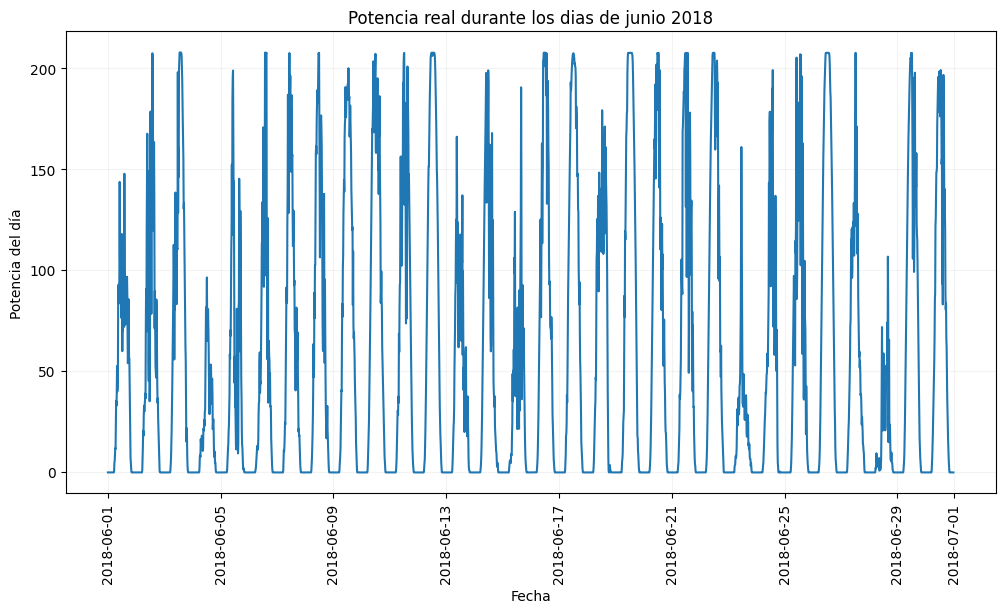

In [ ]:
#Representación gráfica de datos reales.
import matplotlib.pyplot as plt

# Se asegura que la columna con las fechas se encuentre en el formato correcto.
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

plt.figure(figsize=(12, 6)) #Se ajusta el tamaño de la gráfica
plt.plot(df['Timestamp'], df['AH3'])  #Se definen los valores a evaluar
plt.xlabel('Fecha')
plt.ylabel('Potencia del día')
plt.title('Potencia real durante los dias de junio 2018')
plt.grid(True, alpha=0.15)
plt.xticks(rotation=90) #Se rotan los valores de las fechas para evitar superposiciones
#Guardar la figura como png
plt.savefig('potencia_real.png')
files.download('potencia_real.png')
plt.show()

## **Potencia estimada y Potencia real vs Tiempo**

Esta es la recta final del código, aquí se realizará la gráfica que junte los datos de la potencia estimada y la potencia real obtenida para un mismo día evaluado.

Cabe aclarar que esta parte sólo entra en vigor si el día evaluado se encuentra en el mes de junio del año 2018. Para el resto de días, el código se limitará a mostrar la potencia estimada.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

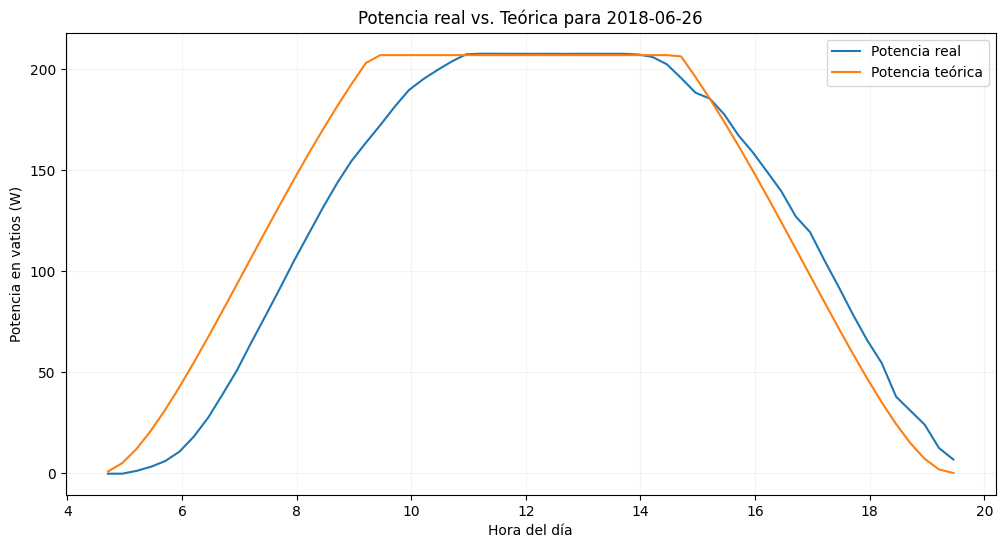

In [ ]:
# Buscar el día específico en el Dataframe
fecha_ingresada = pd.to_datetime(f'{year}-{mes}-{dia}')
df_dia_esp = df[df['Timestamp'].dt.date == fecha_ingresada.date()]

#Se verifica que el día esté en el Dataframe y si las coordenadas son muy cercanas a Natick, Massachusetts.
if not df_dia_esp.empty and 42.2 <= lat <= 42.35 and -71.45 <= lon <= -71.25:

  # Se establece la gráfica para la comparación
  plt.figure(figsize=(12, 6))
  plt.plot(LST_angpos, df_dia_esp['AH3'], label='Potencia real')
  plt.plot(LST_angpos, pot_teo, label='Potencia teórica')

  plt.xlabel('Hora del día')
  plt.ylabel('Potencia en vatios (W)')
  plt.title(f'Potencia real vs. Teórica para {fecha_ingresada.date()}')
  plt.grid(True, alpha=0.15)
  plt.legend()

  # Guardar la figura como png
  plt.savefig('comparacion_potencia.png')
  files.download('comparacion_potencia.png')

  plt.show()
  plt.close()

# **Conclusiones**

Este primer reto planteado en el curso, más allá de una oportunidad de aprender conceptos acerca de la geometría del sol y sobre la tecnología en general que compone a los paneles solares; ha demostrado la importancia de una correcta modelación matemática al momento de realizar un proyecto.

El código puede estar lejos de estar pulido a la perfección. Pero si algo es seguro, es que sin la apropiada fundamentación teórica, habría sido imposible estimar la potencia eléctrica que tendrían paneles solares en cualquier parte del mundo, a cualquier hora, en cualquier día, de cualquier año. Así como hubiese sido imposible comparar estos datos con la realidad (Por lo menos en un radio de 20 km alrededor de Natick, MA).  

